In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("test_data/Grounded CPW Leaky Wave antenna/S11 Data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'test_data/Grounded CPW Leaky Wave antenna/S11 Data.csv'

In [ ]:
geometry_1 = df[(df['Feed_Gap [mm]'] == 0.5) & (df['Feed_Inset [cm]'] == 0.2) & (df['Feed_W [cm]'] == 1.2) & (df['Ground_gap [mm]'] == 3) & (df['Pad_L [cm]'] == 0.7) & (df['Pad_W [cm]'] == 0.9)]
geometry_2 = df[(df['Feed_Gap [mm]'] == 0.5) & (df['Feed_Inset [cm]'] == 0.2) & (df['Feed_W [cm]'] == 1.2) & (df['Ground_gap [mm]'] == 4) & (df['Pad_L [cm]'] == 0.7) & (df['Pad_W [cm]'] == 0.9)]
geometry_3 = df[(df['Feed_Gap [mm]'] == 0.5) & (df['Feed_Inset [cm]'] == 0.2) & (df['Feed_W [cm]'] == 0.8) & (df['Ground_gap [mm]'] == 3) & (df['Pad_L [cm]'] == 0.7) & (df['Pad_W [cm]'] == 1)]

## Example:
The plot below shows 3 examples of geometries and their performance (plotted frequency vs performance)
-10 is chosen as the performance requirement, meaning that the geometry selected needs to have performance below -10
The algorithm will seek geometry where entire performance graph is under -10 for selected frequency range 
Example: inputs performance -10 and frequency 15 thru 20
All 3 geometries work for below -10

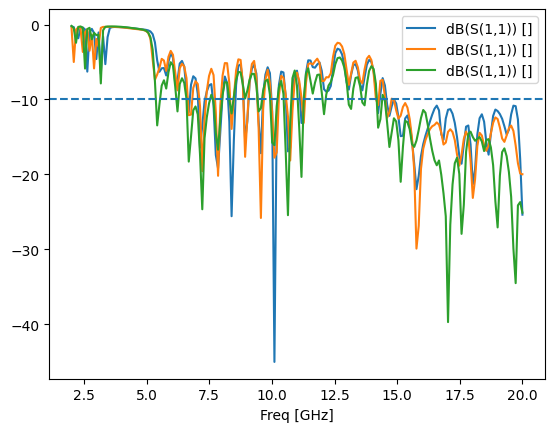

In [ ]:
ax = geometry_1.plot(x='Freq [GHz]', y='dB(S(1,1)) []')
geometry_2.plot(x='Freq [GHz]', y='dB(S(1,1)) []', ax=ax)
geometry_3.plot(x='Freq [GHz]', y='dB(S(1,1)) []', ax=ax)
ax.axhline(-10, linestyle='--')